<a href="https://colab.research.google.com/github/Roberto0611/ChestX-ray/blob/main/pneumonia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Made by: Roberto Ochoa Cuevas :)

In [2]:
# Unzip files ( Just if you are using google collab or any linux interpreter)
!unzip pneumonia/pneuomonia.zip -d pneumonia

Archive:  pneumonia/pneuomonia.zip
  inflating: pneumonia/person1_bacteria_1.jpeg  
  inflating: pneumonia/person1_bacteria_2.jpeg  
  inflating: pneumonia/person1_virus_11.jpeg  
  inflating: pneumonia/person1_virus_12.jpeg  
  inflating: pneumonia/person1_virus_13.jpeg  
  inflating: pneumonia/person1_virus_6.jpeg  
  inflating: pneumonia/person1_virus_7.jpeg  
  inflating: pneumonia/person1_virus_8.jpeg  
  inflating: pneumonia/person1_virus_9.jpeg  
  inflating: pneumonia/person10_bacteria_43.jpeg  
  inflating: pneumonia/person10_virus_35.jpeg  
  inflating: pneumonia/person100_bacteria_475.jpeg  
  inflating: pneumonia/person100_bacteria_477.jpeg  
  inflating: pneumonia/person100_bacteria_478.jpeg  
  inflating: pneumonia/person100_bacteria_479.jpeg  
  inflating: pneumonia/person100_bacteria_480.jpeg  
  inflating: pneumonia/person100_bacteria_481.jpeg  
  inflating: pneumonia/person100_bacteria_482.jpeg  
  inflating: pneumonia/person100_virus_184.jpeg  
  inflating: pneumonia

In [3]:
!unzip normal/normal.zip -d normal

Archive:  normal/normal.zip
  inflating: normal/IM-0001-0001.jpeg  
  inflating: normal/IM-0003-0001.jpeg  
  inflating: normal/IM-0005-0001.jpeg  
  inflating: normal/IM-0006-0001.jpeg  
  inflating: normal/IM-0007-0001.jpeg  
  inflating: normal/IM-0009-0001.jpeg  
  inflating: normal/IM-0010-0001.jpeg  
  inflating: normal/IM-0011-0001.jpeg  
  inflating: normal/IM-0011-0001-0001.jpeg  
  inflating: normal/IM-0011-0001-0002.jpeg  
  inflating: normal/IM-0013-0001.jpeg  
  inflating: normal/IM-0015-0001.jpeg  
  inflating: normal/IM-0016-0001.jpeg  
  inflating: normal/IM-0017-0001.jpeg  
  inflating: normal/IM-0019-0001.jpeg  
  inflating: normal/IM-0021-0001.jpeg  
  inflating: normal/IM-0022-0001.jpeg  
  inflating: normal/IM-0023-0001.jpeg  
  inflating: normal/IM-0025-0001.jpeg  
  inflating: normal/IM-0027-0001.jpeg  
  inflating: normal/IM-0028-0001.jpeg  
  inflating: normal/IM-0029-0001.jpeg  
  inflating: normal/IM-0030-0001.jpeg  
  inflating: normal/IM-0031-0001.jpeg  
  

In [4]:
# Delete the .zip files
!rm -rf normal/normal.zip
!rm -rf pneumonia/pneuomonia.zip

In [5]:
# make a data set folder
!mkdir dataset
!cp -r normal dataset/normal
!cp -r pneumonia dataset/pneumonia

In [6]:
# Modify a little bit the images

from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

# DataSet Generator
datagen = ImageDataGenerator(
  rescale = 1. / 255, # Normalize images
)

data_gen_entrenamiento = datagen.flow_from_directory("/content/dataset",
                                                     target_size=(224,224),
                                                     batch_size=32,shuffle=True,
                                                     subset="training")

data_gen_pruebas = datagen.flow_from_directory("/content/dataset",
                                                     target_size=(224,224),
                                                     batch_size=32,shuffle=True,
                                                     subset="validation")

Found 1000 images belonging to 2 classes.
Found 0 images belonging to 2 classes.


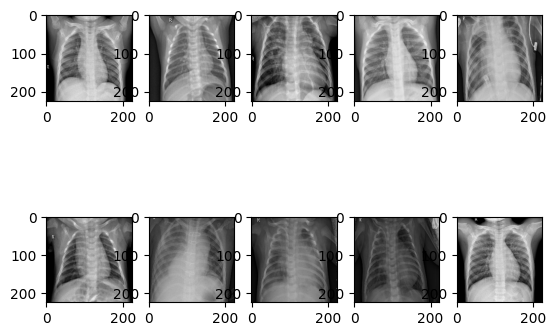

In [7]:
# Show some of our images

import matplotlib.pyplot as plt

for imagenes, etiquetas in data_gen_entrenamiento:
  for i in range(10):
    plt.subplot(2,5, i+1)
    plt.imshow(imagenes[i])

  break

plt.show()

In [8]:
# Learning transfer

import tensorflow as tf
import tensorflow_hub as hub

url ="https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
mobilenetv2 = hub.KerasLayer(url, input_shape=(224, 224, 3))

In [9]:
# Freeze the layers
mobilenetv2.trainable = False

In [10]:
# Create model
modelo = tf.keras.Sequential([
    mobilenetv2,
    tf.keras.layers.Dense(2, activation="softmax")
])

In [11]:
# Compile the model
modelo.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics = ["accuracy"]
)

In [12]:
EPOCAS = 20
entrenamiento = modelo.fit(
    data_gen_entrenamiento, epochs=EPOCAS,batch_size=32,
    validation_data=data_gen_pruebas
)

Epoch 1/20
32/32 [==============================] - 19s 382ms/step - loss: 0.3556 - accuracy: 0.8540
Epoch 2/20
32/32 [==============================] - 12s 372ms/step - loss: 0.1557 - accuracy: 0.9510
Epoch 3/20
32/32 [==============================] - 12s 372ms/step - loss: 0.1149 - accuracy: 0.9660
Epoch 4/20
32/32 [==============================] - 12s 369ms/step - loss: 0.0999 - accuracy: 0.9710
Epoch 5/20
32/32 [==============================] - 12s 371ms/step - loss: 0.0864 - accuracy: 0.9710
Epoch 6/20
32/32 [==============================] - 12s 376ms/step - loss: 0.0814 - accuracy: 0.9730
Epoch 7/20
32/32 [==============================] - 12s 372ms/step - loss: 0.0747 - accuracy: 0.9770
Epoch 8/20
32/32 [==============================] - 12s 372ms/step - loss: 0.0646 - accuracy: 0.9770
Epoch 9/20
32/32 [==============================] - 12s 374ms/step - loss: 0.0611 - accuracy: 0.9790
Epoch 10/20
32/32 [==============================] - 12s 382ms/step - loss: 0.0571 - accura

In [13]:
# Function to test with any image
from PIL import Image
import cv2

def categorizar(ruta):
  img = Image.open(ruta)
  img = img.convert("RGB")
  img = np.array(img).astype(float)/255

  img = cv2.resize(img, (224,224))
  prediccion = modelo.predict(img.reshape(-1,224,224,3))
  return np.argmax(prediccion[0], axis = -1)

In [18]:
# Function to convert 0 to normal and 1 to pneumonia

def prediction(file):
  ruta = file
  prediccion = categorizar(ruta)

  if prediccion == 0:
    return "Normal"
  else:
    return "Pneumony"


0 equals normal, 1 equals pneumonia


In [19]:
prediction("normal.jpeg")

1/1 [==============================] - 0s 24ms/step


'Normal'

In [20]:
prediction("pneumonia.jpeg")

1/1 [==============================] - 0s 82ms/step


'Pneumony'